In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [31]:
data = pd.read_csv("C:/Users/mayan/Dropbox/PC/Desktop/Data Mining/project/the weather of 187 countries in 2020.csv",low_memory = False)

In [6]:
data

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392570,COM00080091,Colombia,2020-07-23,2020,7,23,0.0,NaN,28.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392571,COM00080091,Colombia,2020-07-24,2020,7,24,NaN,NaN,27.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392572,COM00080091,Colombia,2020-07-25,2020,7,25,NaN,NaN,26.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392573,COM00080091,Colombia,2020-07-26,2020,7,26,NaN,NaN,28.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(1392575, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392575 entries, 0 to 1392574
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STATION          1392575 non-null  object 
 1   Country/Region   1392575 non-null  object 
 2   DATE             1392575 non-null  object 
 3   Year             1392575 non-null  int64  
 4   Month            1392575 non-null  int64  
 5   Day              1392575 non-null  int64  
 6   PRCP             1043369 non-null  float64
 7   SNWD             377429 non-null   float64
 8   TAVG             878632 non-null   float64
 9   TMAX             866705 non-null   float64
 10  TMIN             898381 non-null   float64
 11  SNOW             105392 non-null   float64
 12  LATITUDE         104742 non-null   float64
 13  LONGITUDE        104742 non-null   float64
 14  ELEVATION        104742 non-null   float64
 15  PRCP_ATTRIBUTES  6007 non-null     object 
 16  TAVG_ATTRIBUTES  3

Changing date data type for date

In [32]:
data['DATE']= pd.to_datetime(data['DATE'],format="%Y-%m-%d")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392575 entries, 0 to 1392574
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   STATION          1392575 non-null  object        
 1   Country/Region   1392575 non-null  object        
 2   DATE             1392575 non-null  datetime64[ns]
 3   Year             1392575 non-null  int64         
 4   Month            1392575 non-null  int64         
 5   Day              1392575 non-null  int64         
 6   PRCP             1043369 non-null  float64       
 7   SNWD             377429 non-null   float64       
 8   TAVG             878632 non-null   float64       
 9   TMAX             866705 non-null   float64       
 10  TMIN             898381 non-null   float64       
 11  SNOW             105392 non-null   float64       
 12  LATITUDE         104742 non-null   float64       
 13  LONGITUDE        104742 non-null   float64       
 14  EL

Checking Null Values

In [ ]:
data.isnull().sum()

STATION                  0
Country/Region           0
DATE                     0
Year                     0
Month                    0
Day                      0
PRCP                349206
SNWD               1015146
TAVG                513943
TMAX                525870
TMIN                494194
SNOW               1287183
LATITUDE           1287833
LONGITUDE          1287833
ELEVATION          1287833
PRCP_ATTRIBUTES    1386568
TAVG_ATTRIBUTES    1388725
TMAX_ATTRIBUTES    1386938
TMIN_ATTRIBUTES    1386701
DAPR               1391282
MDPR               1392494
WESD               1392573
SNWD_ATTRIBUTES    1392221
dtype: int64

<h1> Columns to Remove:

DAPR, MDPR, WESD, PRCP_ATTRIBUTES, TAVG_ATTRIBUTES, TMAX_ATTRIBUTES, TMIN_ATTRIBUTES, SNWD_ATTRIBUTES: These columns have a high percentage of missing values (over 99%), and it's unlikely they will provide meaningful insights. It's advisable to remove them. \

LATITUDE, LONGITUDE, ELEVATION : We can find the latitude and longitude of the countries with the help of python libraries but it will not help in the model so dropping both of them too and droping ELEVATION too as it has more than 95% null values and the data is not available to add in the datasets.

In [33]:
data.drop(['PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES','DAPR',
           'MDPR','WESD','SNWD_ATTRIBUTES','LATITUDE','LONGITUDE', 'ELEVATION'], axis=1,inplace=True)

Dealing with Remaining Null Values

In [ ]:
data.isnull().sum()

STATION                 0
Country/Region          0
DATE                    0
Year                    0
Month                   0
Day                     0
PRCP               349206
SNWD              1015146
TAVG               513943
TMAX               525870
TMIN               494194
SNOW              1287183
dtype: int64

In [34]:
columns_to_fill = ['PRCP', 'TMAX', 'TMIN']
country_means = data.groupby('Country/Region')[columns_to_fill].transform('median')
data[columns_to_fill] = data[columns_to_fill].fillna(country_means)

In [35]:
data.isnull().sum()

STATION                 0
Country/Region          0
DATE                    0
Year                    0
Month                   0
Day                     0
PRCP                19123
SNWD              1015146
TAVG               513943
TMAX                15424
TMIN                12993
SNOW              1287183
dtype: int64

In [36]:
data['TAVG'].fillna((data['TMIN']+data['TMAX'])/2, inplace = True)

In [37]:
data.isnull().sum()

STATION                 0
Country/Region          0
DATE                    0
Year                    0
Month                   0
Day                     0
PRCP                19123
SNWD              1015146
TAVG                    0
TMAX                15424
TMIN                12993
SNOW              1287183
dtype: int64

In [38]:
data[data['TMIN'].isnull()]

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW
33182,VE000002417,Saint Lucia,2020-01-24,2020,1,24,NaN,NaN,27.6,NaN,NaN,NaN
33183,VE000002417,Saint Lucia,2020-01-25,2020,1,25,NaN,NaN,26.4,NaN,NaN,NaN
33184,VE000002417,Saint Lucia,2020-01-26,2020,1,26,NaN,NaN,25.1,NaN,NaN,NaN
33185,VE000002417,Saint Lucia,2020-01-27,2020,1,27,NaN,NaN,25.8,NaN,NaN,NaN
33186,VE000002417,Saint Lucia,2020-01-28,2020,1,28,NaN,NaN,26.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1133959,PPM00092047,Papua New Guinea,2020-07-27,2020,7,27,0.5,NaN,26.9,NaN,NaN,NaN
1133960,PPM00092077,Papua New Guinea,2020-05-14,2020,5,14,0.5,NaN,28.8,NaN,NaN,NaN
1133961,PPM00092076,Papua New Guinea,2020-03-10,2020,3,10,11.9,NaN,27.8,NaN,NaN,NaN
1133962,PPM00092076,Papua New Guinea,2020-06-18,2020,6,18,2.0,NaN,30.4,NaN,NaN,NaN


From above, we can see that for some countries all the data is null except dates. So we can remove the rows for this countries.

In [39]:
data = data.dropna(subset=['PRCP','TAVG', 'TMAX', 'TMIN'],thresh=4)

In [40]:
data.shape

(1370423, 12)

In [41]:
data.isnull().sum()

STATION                 0
Country/Region          0
DATE                    0
Year                    0
Month                   0
Day                     0
PRCP                    0
SNWD               993155
TAVG                    0
TMAX                    0
TMIN                    0
SNOW              1265031
dtype: int64

Number of Rows for each country.

In [42]:
country_counts = data['Country/Region'].value_counts()
country_counts.head(15)

Canada         254817
Sweden         111499
Germany        103931
Russia          91988
Netherlands     64137
Norway          51281
Finland         43937
Taiwan          38949
China           38949
Spain           32230
Japan           23855
Maldives        23007
India           23007
Bhutan          23007
Guatemala       22456
Name: Country/Region, dtype: int64

Taking Top 15 countries as it has major part of the dataset (To make the plot understable we taking few countries only)

In [43]:
country = ['Canada','Sweden','Germany','Russia','Netherlands','Norway','Finland','Taiwan','China','Spain','Japan','Maldives','India','Bhutan','Guatemala']

In [45]:
data = data[data['Country/Region'].isin(country)]

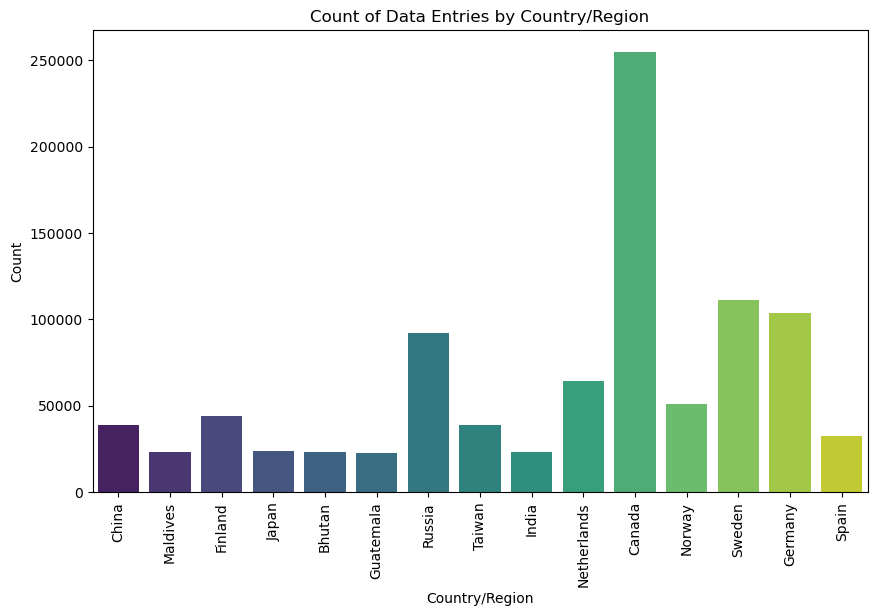

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Country/Region', palette='viridis')
plt.title('Count of Data Entries by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Correlation between Features

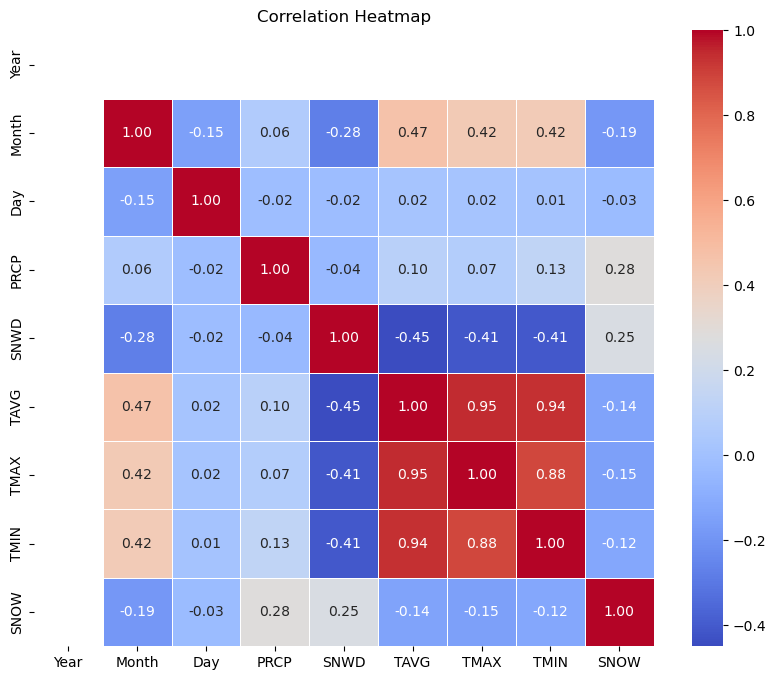

In [47]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

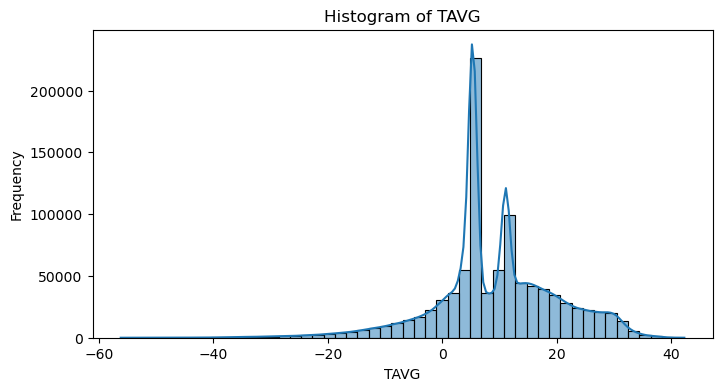

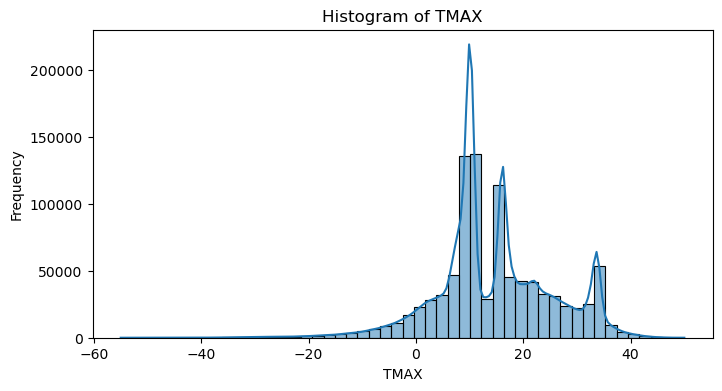

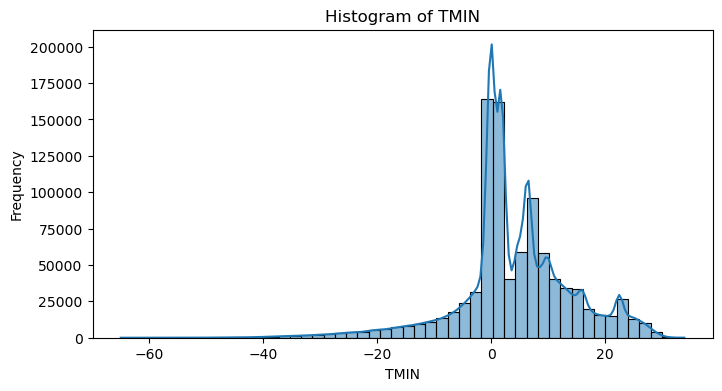

In [48]:
numerical_columns = ['TAVG', 'TMAX', 'TMIN']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Graph for particular station and country as taking all data in the chart will give a chart impossible to understand.

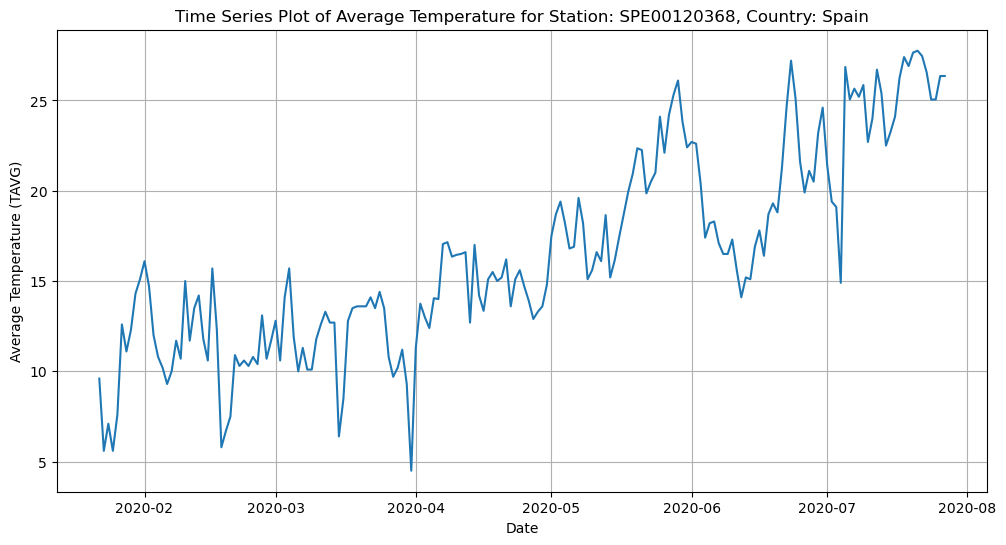

In [49]:
station_to_analyze = 'SPE00120368'
country_to_analyze = 'Spain'

filtered_data = data[(data['STATION'] == station_to_analyze) & (data['Country/Region'] == country_to_analyze)]

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['DATE'], filtered_data['TAVG'])
plt.title(f'Time Series Plot of Average Temperature for Station: {station_to_analyze}, Country: {country_to_analyze}')
plt.xlabel('Date')
plt.ylabel('Average Temperature (TAVG)')
plt.grid(True)
plt.show()

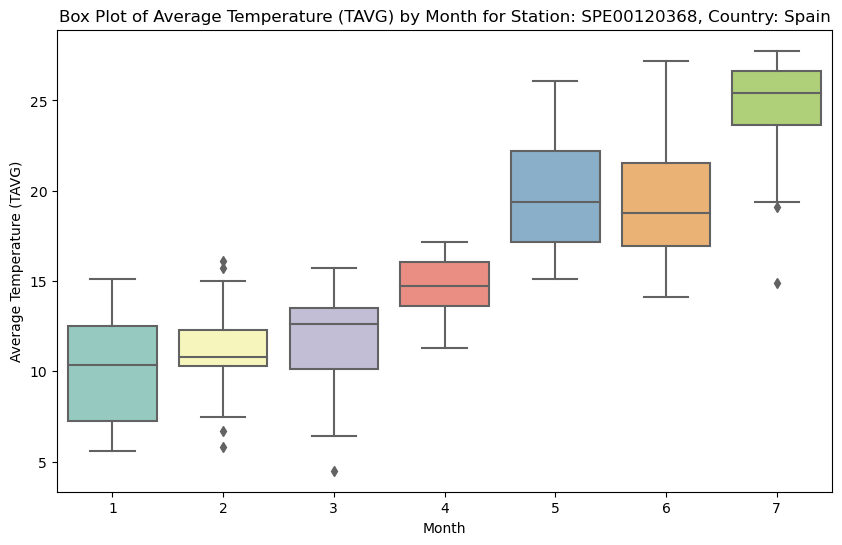

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Month', y='TAVG', palette='Set3')
plt.title(f'Box Plot of Average Temperature (TAVG) by Month for Station: {station_to_analyze}, Country: {country_to_analyze}')
plt.xlabel('Month')
plt.ylabel('Average Temperature (TAVG)')
plt.xticks(rotation=0)
plt.show()

Mean Squared Error (MSE): 1.8397635418229314
R-squared (R2): 0.8783757312660088


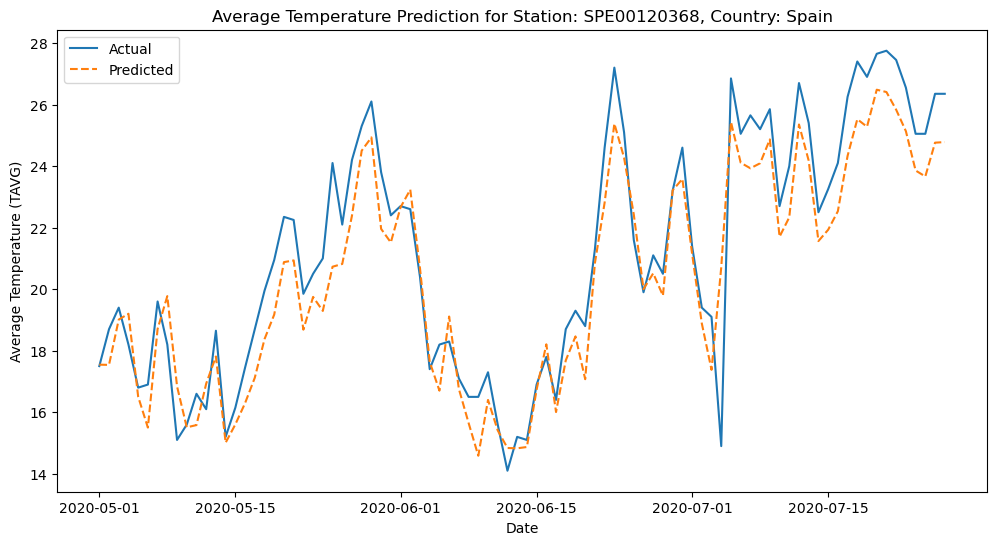

In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

target_variable = 'TAVG'
features = ['PRCP', 'TMAX', 'TMIN']
data1 = filtered_data[['DATE'] + features + [target_variable]]
train_data = data1[data1['DATE'] < '2020-05-01']
test_data = data1[(data1['DATE'] >= '2020-05-01')]

X_train, y_train = train_data[features], train_data[target_variable]
X_test, y_test = test_data[features], test_data[target_variable]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

plt.figure(figsize=(12, 6))
plt.plot(test_data['DATE'], y_test, label='Actual')
plt.plot(test_data['DATE'], y_pred, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Temperature (TAVG)')
plt.title(f'Average Temperature Prediction for Station: {station_to_analyze}, Country: {country_to_analyze}')
plt.legend()
plt.show()


In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
train_data = data1[data1['DATE'] < '2020-05-01']
test_data = data1[(data1['DATE'] >= '2020-05-01') & (data1['DATE'] < '2020-07-21')]

X_train, y_train = train_data[features], train_data[target_variable]
X_test, y_test = test_data[features], test_data[target_variable]

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

latest_data = data1.iloc[-14:-7,:]
X_future = latest_data[features]

y_future_pred = model.predict(X_future)

print("Predicted TAVG for the Next 7 Days:")
print(y_future_pred)

latest_date = latest_data['DATE'].max()
next_7_days = [latest_date + timedelta(days=i) for i in range(1, 8)]

print("Dates for the Next 7 Days:")
for date in next_7_days:
    print(date.strftime('%Y-%m-%d'))

Predicted TAVG for the Next 7 Days:
[21.5635606  21.93034848 22.53280429 24.3313144  25.5240472  25.27952194
 26.48285188]
Dates for the Next 7 Days:
2020-07-21
2020-07-22
2020-07-23
2020-07-24
2020-07-25
2020-07-26
2020-07-27
